In [307]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import date
%matplotlib inline
import scipy.stats as stats

In [289]:
loan = pd.read_csv('C:/Users/Lenovo/Downloads/Basic Statistics - Hypothesis Testing/LoansData.csv')

In [8]:
loan.columns

Index(['Amount.Requested', 'Amount.Funded.By.Investors', 'Interest.Rate',
       'Loan.Length', 'Loan.Purpose', 'Debt.To.Income.Ratio', 'State',
       'Home.Ownership', 'Monthly.Income', 'FICO.Range', 'Open.CREDIT.Lines',
       'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months',
       'Employment.Length'],
      dtype='object')

In [9]:
loan.head(1)

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year


In [10]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2499 non-null   float64
 1   Amount.Funded.By.Investors      2499 non-null   float64
 2   Interest.Rate                   2498 non-null   object 
 3   Loan.Length                     2500 non-null   object 
 4   Loan.Purpose                    2500 non-null   object 
 5   Debt.To.Income.Ratio            2499 non-null   object 
 6   State                           2500 non-null   object 
 7   Home.Ownership                  2499 non-null   object 
 8   Monthly.Income                  2499 non-null   float64
 9   FICO.Range                      2498 non-null   object 
 10  Open.CREDIT.Lines               2497 non-null   float64
 11  Revolving.CREDIT.Balance        2497 non-null   float64
 12  Inquiries.in.the.Last.6.Months  24

In [290]:
loan.rename(columns={'Amount.Requested':'Amount_Requested','Amount.Funded.By.Investors':'Amount_Funded_By_Investors','Interest.Rate':'Interest_Rate'},inplace=True)

In [13]:
loan

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.00,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.00,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.00,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.00,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.00,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,30000.0,29950.00,16.77%,60 months,debt_consolidation,19.23%,NY,MORTGAGE,9250.00,705-709,15.0,45880.0,1.0,8 years
2496,16000.0,16000.00,14.09%,60 months,home_improvement,21.54%,MD,OWN,8903.25,740-744,18.0,18898.0,1.0,10+ years
2497,10000.0,10000.00,13.99%,36 months,debt_consolidation,4.89%,PA,MORTGAGE,2166.67,680-684,4.0,4544.0,0.0,10+ years
2498,6000.0,6000.00,12.42%,36 months,major_purchase,16.66%,NJ,RENT,3500.00,675-679,8.0,7753.0,0.0,5 years


In [291]:
loan.rename(columns={'Loan.Length':'Loan_Length','Loan.Purpose':'Loan_Purpose','Debt.To.Income.Ratio':'Debt_To_Income_Ratio','Home.Ownership':'Home_Ownership','Home.Ownership':'Home_Ownership','Monthly.Income':'Monthly_Income','FICO.Range':'FICO_Range','Open.CREDIT.Lines':'Open_Credit_Lines','Revolving.CREDIT.Balance':'Revolving_Credit_Balance','Inquiries.in.the.Last.6.Months':'Inquiries_in_the_Last_6_Months','Employment.Length':'Employment_Length'},inplace=True)

In [26]:
loan.head()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_Credit_Lines,Revolving_Credit_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,20000.0,20000.0,8.90,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.0,9.99,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.0,11.71,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [292]:
loan['Interest_Rate'] =loan['Interest_Rate'].str.replace('%','')

In [27]:
loan.head(1)

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_Credit_Lines,Revolving_Credit_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,20000.0,20000.0,8.9,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year


In [293]:
loan['Interest_Rate'] =loan['Interest_Rate'].astype(float)

In [28]:
loan['Employment_Length'].unique()

array(['< 1 year', '2 years', '5 years', '9 years', '3 years',
       '10+ years', '8 years', '6 years', '1 year', '7 years', '4 years',
       nan], dtype=object)

In [294]:
# Ques 1a. Interest rate is varied for different loan amounts (Less intrest charged for high loan amounts)
loan.dropna(subset=['Interest_Rate','Amount_Funded_By_Investors'],inplace=True)
# Null Hypothesis:Interest rate is varied for different loan amounts
# Alternate Hypothesis:Interest rate is same for different loan amounts
# Significance value=0.05
# Confidence interval =95%
# As there are two continous variables,so we will perform pearson correlation statistical test
stats.pearsonr(loan['Interest_Rate'],loan['Amount_Funded_By_Investors'])
#conclusion:
# As the p-value is greater than 0.05 i.e(significance value),There is strong correlation between interest rate and Loan Amount
# In the above case we are failed to reject the null hypothesis.

                                                                        

PearsonRResult(statistic=0.33745400436759665, pvalue=1.4916862719480412e-67)

In [295]:
# Ques 1b Loan length is directly effecting interest rate.
loan['Loan_Length']=loan['Loan_Length'].str.replace('months','').astype(float)
loan.head(1)

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_Credit_Lines,Revolving_Credit_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,20000.0,20000.0,8.9,36.0,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year


In [296]:
# Null Hypothesis:Loan length is not effecting interest rate.
# Alternate Hypothesis:Loan length is  effecting interest rate.
# Significance value=0.05
# Confidence interval =95%
# As there are two continous variables,so we will perform pearson correlation statistical test
stats.pearsonr(loan['Loan_Length'],loan['Interest_Rate'])
#conclusion:
# As the p-value is greater than 0.05 i.e(significance value),There is strong correlation between interest rate and Loan length
# In the above case we are failed to reject the null hypothesis.


PearsonRResult(statistic=0.4241835190219525, pvalue=1.267510925697048e-109)

In [297]:
# Ques 1c Interest rate varies for different purpose of loans
loan['Loan_Purpose'].unique()

array(['debt_consolidation', 'credit_card', 'other', 'moving', 'car',
       'vacation', 'home_improvement', 'house', 'major_purchase',
       'educational', 'medical', 'wedding', 'small_business',
       'renewable_energy'], dtype=object)

In [298]:
loan['encode'] = loan['Loan_Purpose'].map({'debt_consolidation':1,'credit_card':2,'other':3,'moving':4,'car':5,'vacation':6,'home_improvement':7,'house':8,'major_purchase':9,'educational':10,'medical':11,'wedding':12,'small_business':13,'renewable_energy':14})

In [57]:
loan.head(1)

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_Credit_Lines,Revolving_Credit_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,encode
0,20000.0,20000.0,8.9,36.0,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year,1


In [299]:
l1 =loan.loc[loan['encode']==1,'Interest_Rate']
l2 =loan.loc[loan['encode']==2,'Interest_Rate']
l3 =loan.loc[loan['encode']==3,'Interest_Rate']
l4 =loan.loc[loan['encode']==4,'Interest_Rate']
l5 =loan.loc[loan['encode']==5,'Interest_Rate']
l6 =loan.loc[loan['encode']==6,'Interest_Rate']
l7 =loan.loc[loan['encode']==7,'Interest_Rate']
l8 =loan.loc[loan['encode']==8,'Interest_Rate']
l9 =loan.loc[loan['encode']==9,'Interest_Rate']
l10 =loan.loc[loan['encode']==10,'Interest_Rate']
l11 =loan.loc[loan['encode']==11,'Interest_Rate']
l12 =loan.loc[loan['encode']==12,'Interest_Rate']
l13 =loan.loc[loan['encode']==13,'Interest_Rate']
l14 =loan.loc[loan['encode']==14,'Interest_Rate']
# Null Hypothesis:Interest rate doesn't varies for different purpose of loans
# Alternate Hypothesis:Interest rate varies for different purpose of loans
# Significance value=0.05
# Confidence interval =95%
# As there is one continous variable and one categorical variable,so we will perform f-oneway statistical test
stats.f_oneway(l1,l2,l3,l4,l5,l6,l7,l8,l9,l10,l11,l12,l13,l14)
#conclusion:
# As the p-value is smaller than 0.05 i.e(significance value)
# In the above case we are rejecting the null hypothesis.


F_onewayResult(statistic=7.486710128328652, pvalue=1.1349601779818787e-14)

In [312]:
# Ques 1d. There is relationship between FICO scores and Home Ownership. It means that, People with owning home will have high FICO scores
observed =pd.crosstab(loan['Home_Ownership']=='OWN',loan['FICO_Range'])
# Null Hypothesis:People with owning home will have high FICO scores
# Alternate Hypothesis:People with owning home will have high FICO scores
# Significance value=0.05
# Confidence interval =95%
stats.chi2_contingency(observed)
#conclusion:
# As the p-value is greater than 0.05 i.e(significance value)
# In the above case we are failed toreject the null hypothesis.


(50.205820374996726,
 0.07233575665549935,
 37,
 array([[4.59919840e+00, 2.75951904e+00, 9.19839679e-01, 3.67935872e+00,
         1.14060120e+02, 1.33376754e+02, 1.57292585e+02, 1.52693387e+02,
         1.44414830e+02, 1.25098196e+02, 1.27857715e+02, 1.40735471e+02,
         1.20498998e+02, 1.23258517e+02, 1.02102204e+02, 8.55450902e+01,
         1.04861723e+02, 8.64649299e+01, 8.64649299e+01, 5.97895792e+01,
         4.87515030e+01, 4.96713427e+01, 5.61102204e+01, 4.23126253e+01,
         4.23126253e+01, 3.31142285e+01, 1.56372745e+01, 2.02364729e+01,
         2.57555110e+01, 1.74769539e+01, 1.83967936e+01, 1.19579158e+01,
         1.19579158e+01, 1.01182365e+01, 7.35871743e+00, 5.51903808e+00,
         9.19839679e-01, 9.19839679e-01],
        [4.00801603e-01, 2.40480962e-01, 8.01603206e-02, 3.20641283e-01,
         9.93987976e+00, 1.16232465e+01, 1.37074148e+01, 1.33066132e+01,
         1.25851703e+01, 1.09018036e+01, 1.11422846e+01, 1.22645291e+01,
         1.05010020e+01, 1.0741483

In [72]:
price = pd.read_csv('C:/Users/Lenovo/Downloads/Basic Statistics - Hypothesis Testing/Price_Quotes.csv')
price

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129
5,6,136,119
6,7,94,97
7,8,103,104
8,9,140,127
9,10,152,133


In [ ]:
#Ques 2 We would like to assess if there is any difference in the average price quotes provided by Mary and Barry

In [78]:
# Null Hypothesis:There is no difference in the average price quotes provided by Mary and Barry
# Alternate Hypothesis:There is a difference in the average price quotes provided by Mary and Barry
# Significance value=0.05
# Confidence interval =95%
# As there are two continous variable,so we will perform pearson correlation statistical test
stats.pearsonr(price['Barry_Price'],price['Mary_Price'])
#conclusion:
# As the p-value is smaller than 0.05 i.e(significance value)
# In the above case we are rejecting the null hypothesis.

PearsonRResult(statistic=0.8244127830429856, pvalue=0.0009709574235546202)

In [82]:
treatment = pd.read_csv('C:/Users/Lenovo/Downloads/Basic Statistics - Hypothesis Testing/Treatment_Facility.csv')
treatment.head()

,Month,Reengineer,Employee_Turnover,VAR4,VAR5
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096


In [86]:
treatment.rename(columns ={'VAR4':'TRFF','VAR5':'CI'},inplace=True)

In [90]:
# Ques 3 Determine what effect, if any, the reengineering effort had on the incidence behavioral problems and staff turnover. i.e To determine if the reengineering effortchanged the critical incidence rate. Is there evidence that the critical incidence rate has improved?
prior = treatment.loc[treatment['Reengineer'] =='Prior','CI']
post = treatment.loc[treatment['Reengineer'] =='Post','CI']
# Null Hypothesis:The critical incidence rate has  improved
# Alternate Hypothesis:the critical incidence rate has not improved
# Significance value=0.05
# Confidence interval =95%
# As there is one continous variable and one categorical variable,so we will perform two-sample t-test statistical test
stats.ttest_ind(prior,post,equal_var=False)
#conclusion:
# As the p-value is greater than 0.05 i.e(significance value)
# In the above case we are failed to reject the null hypothesis.


Ttest_indResult(statistic=2.209006531430452, pvalue=0.045565519570193204)

In [94]:
# Ques4 
assesment = pd.read_csv('C:/Users/Lenovo/Downloads/Basic Statistics - Hypothesis Testing/Priority_Assessment.csv')
assesment

,Days,Priority
0,3.3,High
1,7.9,Medium
2,0.3,High
3,0.7,Medium
4,8.6,Medium
...,...,...
637,2.5,Low
638,0.3,High
639,0.3,Medium
640,1.3,Medium


In [104]:
high = assesment.loc[assesment['Priority'] =='High','Days']
medium = assesment.loc[assesment['Priority'] =='Medium','Days']
low =assesment.loc[assesment['Priority'] =='Low','Days']
# Null Hypothesis:Priortization systme is working
# Alternate Hypothesis:Priortization is not workking properly
# Significance value=0.05
# Confidence interval =95%
# As there is one continous variable and one categorical variable,so we will perform f-oneway statistical test
stats.f_oneway(high,medium,low)
#conclusion:
# As the p-value is greater than 0.05 i.e(significance value)
# In the above case we are failed to reject the null hypothesis.

F_onewayResult(statistic=1.812311010076072, pvalue=0.16411459461716182)

In [261]:
films = pd.read_csv('C:/Users/Lenovo/Downloads/Basic Statistics - Hypothesis Testing/Films.csv')
films['Marital_Status'].value_counts()

2          208
1           88
Single      18
Married     12
Slngle       2
Name: Marital_Status, dtype: int64

In [128]:
films.head()

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,2,1,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,2,2,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,1,1,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,2,1,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,2,1,1.0,1.0,1.0,1.0,3.0,3.0,1


In [270]:
films['Gender'] =np.where(films['Gender'] == '1','Male',films['Gender'])
films['Gender'] =np.where(films['Gender'] == '2','Female',films['Gender'])
films['Marital_Status'] =np.where(films['Marital_Status'] == '1','Married',films['Marital_Status'])
films['Marital_Status'] =np.where(films['Marital_Status'] == '2','Single',films['Marital_Status'])
films['Marital_Status'] =np.where(films['Marital_Status'] == 'Slngle','Single',films['Marital_Status'])
                 

    


In [247]:
films['Age'].value_counts()


2.0    175
3.0    117
1.0     26
4.0     10
Name: Age, dtype: int64

In [248]:
films['Income'].value_counts()

1.0    142
3.0     90
2.0     82
Name: Income, dtype: int64

In [158]:
films

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
325,0,Old School,Female,Single,1.0,2.0,1.0,1.0,2.0,1.0,1
326,0,Old School,Male,Married,2.0,2.0,2.0,2.0,3.0,3.0,5
327,0,Old School,Female,Married,2.0,1.0,1.0,2.0,2.0,2.0,5
328,0,Old School,Male,Married,1.0,1.0,1.0,1.0,2.0,1.0,3


In [272]:
#Ques 5b  What factors are linked to satisfaction?
sin_over =pd.crosstab(films['Sinage'],films['Overall'])
observed = sin_over.values
# Null Hypothesis:factors are related to each other
# Alternate Hypothesis:factors are not related to each other
# Significance value=0.05
# Confidence interval =95%
stats.chi2_contingency(observed)
#conclusion:
# As the p-value is smaller than 0.05 i.e(significance value)
# In the above case we are rejecting the null hypothesis.

(121.32462033201084,
 3.054444776360607e-18,
 16,
 array([[4.77906977e+01, 5.16279070e+01, 4.18604651e+00, 3.48837209e-01,
         1.04651163e+00],
        [6.37209302e+01, 6.88372093e+01, 5.58139535e+00, 4.65116279e-01,
         1.39534884e+00],
        [2.04817276e+01, 2.21262458e+01, 1.79401993e+00, 1.49501661e-01,
         4.48504983e-01],
        [2.73089701e+00, 2.95016611e+00, 2.39202658e-01, 1.99335548e-02,
         5.98006645e-02],
        [2.27574751e+00, 2.45847176e+00, 1.99335548e-01, 1.66112957e-02,
         4.98338870e-02]]))

In [273]:
park_over =pd.crosstab(films['Parking'],films['Overall'])
observed2 = park_over.values
# Null Hypothesis:factors are related to each other
# Alternate Hypothesis:factors are not related to each other
# Significance value=0.05
# Confidence interval =95%
stats.chi2_contingency(observed2)
#conclusion:
# As the p-value is smaller than 0.05 i.e(significance value)
# In the above case we are rejecting the null hypothesis.

(218.79348282085004,
 1.2264032549812005e-37,
 16,
 array([[5.55282392e+01, 5.99867110e+01, 4.86378738e+00, 4.05315615e-01,
         1.21594684e+00],
        [6.32657807e+01, 6.83455150e+01, 5.54152824e+00, 4.61794020e-01,
         1.38538206e+00],
        [1.31993355e+01, 1.42591362e+01, 1.15614618e+00, 9.63455150e-02,
         2.89036545e-01],
        [3.18604651e+00, 3.44186047e+00, 2.79069767e-01, 2.32558140e-02,
         6.97674419e-02],
        [1.82059801e+00, 1.96677741e+00, 1.59468439e-01, 1.32890365e-02,
         3.98671096e-02]]))

In [275]:
clean_over =pd.crosstab(films['Clean'],films['Overall'])
observed3= clean_over.values
# Null Hypothesis:factors are related to each other
# Alternate Hypothesis:factors are not related to each other
# Significance value=0.05
# Confidence interval =95%
stats.chi2_contingency(observed3)
#conclusion:
# As the p-value is smaller than 0.05 i.e(significance value)
# In the above case we are rejecting the null hypothesis.

(129.0342392337068,
 9.882317099745693e-20,
 16,
 array([[6.09900332e+01, 6.58870432e+01, 5.34219269e+00, 4.45182724e-01,
         1.33554817e+00],
        [6.28106312e+01, 6.78538206e+01, 5.50166113e+00, 4.58471761e-01,
         1.37541528e+00],
        [1.00132890e+01, 1.08172757e+01, 8.77076412e-01, 7.30897010e-02,
         2.19269103e-01],
        [2.27574751e+00, 2.45847176e+00, 1.99335548e-01, 1.66112957e-02,
         4.98338870e-02],
        [9.10299003e-01, 9.83388704e-01, 7.97342193e-02, 6.64451827e-03,
         1.99335548e-02]]))

In [174]:
# Ques 5c What is the demographic profile of Film on the Rocks patrons?
films.head()

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

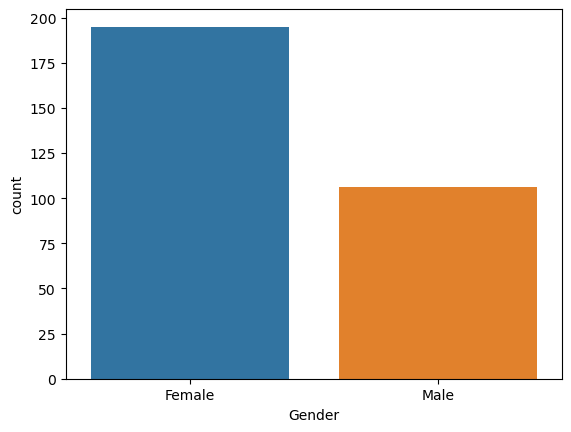

In [276]:
sns.countplot('Gender',data=films)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

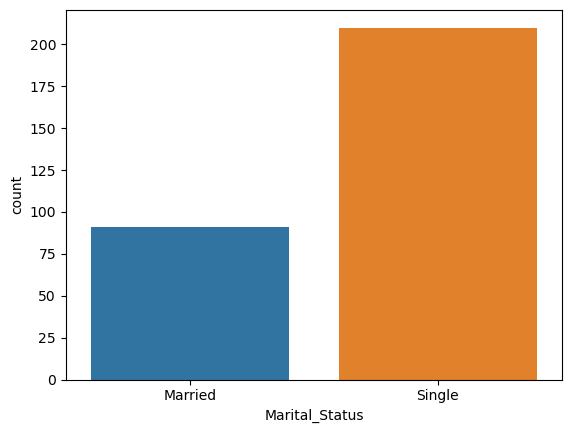

In [277]:
sns.countplot('Marital_Status',data=films)

In [278]:
films['Age'] = np.where(films['Age'] == '1.0','1-12',films['Age'])
films['Age'] = np.where(films['Age'] == '2.0','13-30',films['Age'])
films['Age'] = np.where(films['Age'] == '3.0','31-60',films['Age'])
films['Age'] = np.where(films['Age'] == '4.0','60+',films['Age'])

              

In [226]:
films['Age'].unique()
films['Age'].dropna()

0      31-60
1      13-30
2        60+
3        60+
4      31-60
       ...  
325    13-30
326    31-60
327    13-30
328    13-30
329    13-30
Name: Age, Length: 330, dtype: object

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

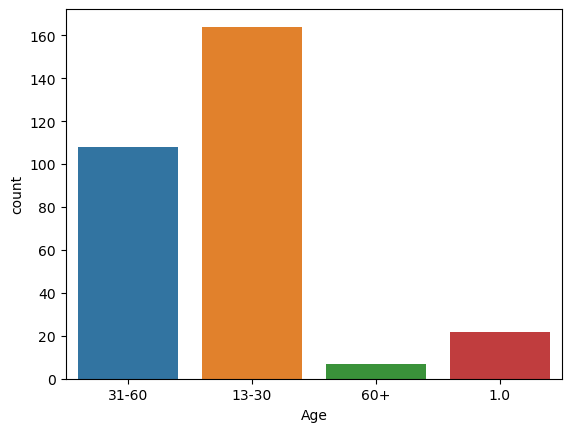

In [279]:
sns.countplot(films['Age'],data=films)

In [280]:
films['Income'] = np.where(films['Income'] == '1.0','Less than $50,000',films['Income'])
films['Income'] = np.where(films['Income'] == '2.0','$50-$100,000',films['Income'])
films['Income'] = np.where(films['Income'] == '3.0','$100,000+',films['Income'])


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income', ylabel='count'>

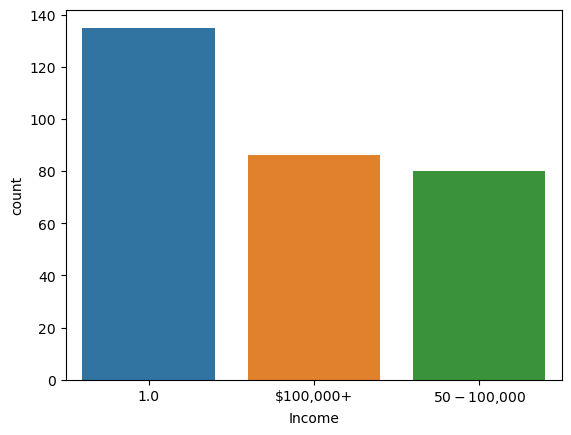

In [281]:
sns.countplot(films['Income'],data=films)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hear_About', ylabel='count'>

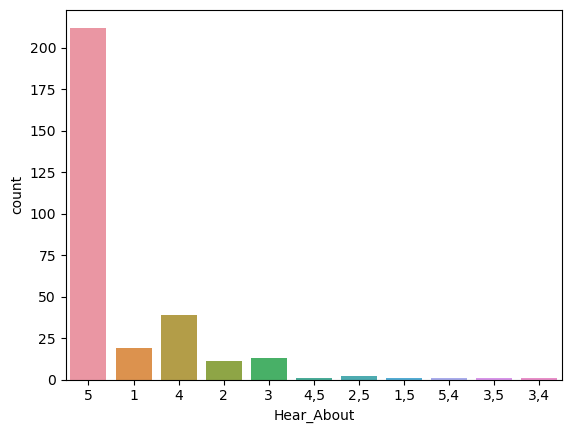

In [283]:
# Ques 5c In what media outlet(s) should the film series be advertised?
sns.countplot(films['Hear_About'],data = films)